<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/inception_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Naïve Inception module from scratch**
---
인셉션 모듈을 만드는 데 필요한 라이브러리를 불러옵니다.

In [ ]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

Naïve Inception 모델을 만들어봅시다.

In [ ]:
# Naïve Inception 블록을 만들기 위한 함수
def naive_inception(input_layer, conv1_filter, conv3_filter, conv5_filter):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)


    # Q. 3x3 사이즈의 kernel을 이용한 convolution2d layer를 만들어 보세요.
    conv3 = keras.layers.Conv2D(conv1_filter, (3,3), padding='same', activation='relu')(input_layer)

    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer를 만들어 보세요.
    # [[YOUR CODE]]
    conv5 = keras.layers.Conv2D(conv1_filter, (5,5), padding='same', activation='relu')(input_layer)

    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

input layer를 정의해주고, naïve Inception 블록도 하나 생성합니다.

In [ ]:
input_data = keras.layers.Input(shape=(256, 256, 3))
naive_inception_out = naive_inception(input_data, 64, 128, 32)

In [ ]:
print(naive_inception_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 195), dtype=tf.float32, name=None), name='concatenate_2/concat:0', description="created by layer 'concatenate_2'")


input layer와 naïve Inception 블록을 연결해서 모델을 만듭니다.

In [ ]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, outputs=naive_inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 256, 256, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 256, 256, 64  1792        ['input_3[0][0]']                
                                )                                                             

tensorflow.keras.utils 라이브러리의 plot_model 함수로 모델의 구조를 시각화할 수 있습니다.

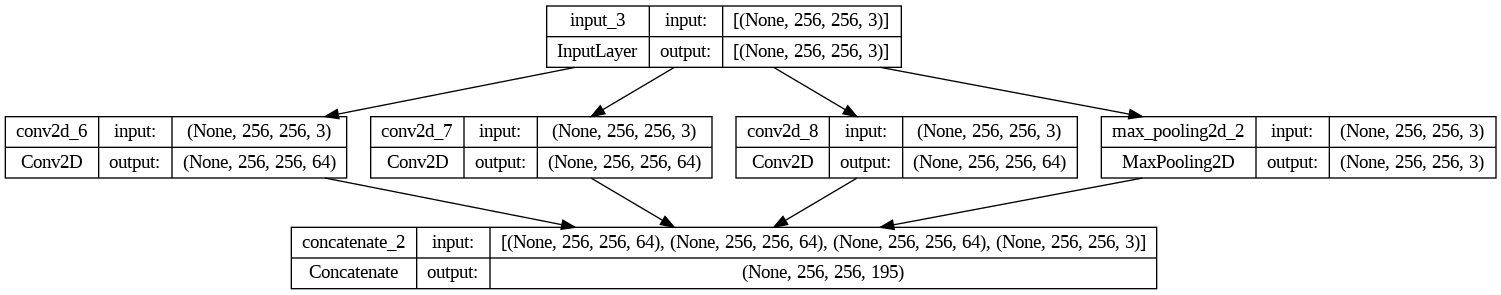

In [ ]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

## **Inception module with 1x1 convolution**
---

Inception module을 만드는 데 필요한 라이브러리를 불러옵니다.

In [ ]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

이번 스텝에서는 조금 더 복잡한 Inception 블록을 구현해 보겠습니다.

In [ ]:
# Inception 블록을 만들기 위한 함수
def inception(input_layer, conv1_filter, conv3_in, conv3_out, conv5_in, conv5_out, pooling_out):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)
    # 3x3 사이즈의 kernel을 이용한 convolution2d layer
    conv3 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    conv3 = keras.layers.Conv2D(conv3_out, (3,3), padding='same', activation='relu')(conv3)


    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer 를 만들어 보세요.
    conv5 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    conv5 = keras.layers.Conv2D(conv3_out, (5,5), padding='same', activation='relu')(conv3)

    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    pool = keras.layers.Conv2D(pooling_out, (1,1), padding='same', activation='relu')(pool)
    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

input layer를 정의하고 Inception 블록을 생성합니다.

In [ ]:
input_data = keras.layers.Input(shape=(256, 256, 3))
inception_out = inception(input_data, 64, 96, 128, 16, 32, 32)

In [ ]:
print(inception)

<function inception at 0x7a05bca1f490>


In [ ]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, outputs=inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 256, 256, 96  384         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_11 (Conv2D)             (None, 256, 256, 12  110720      ['conv2d_10[0][0]']              
                                8)                                                          

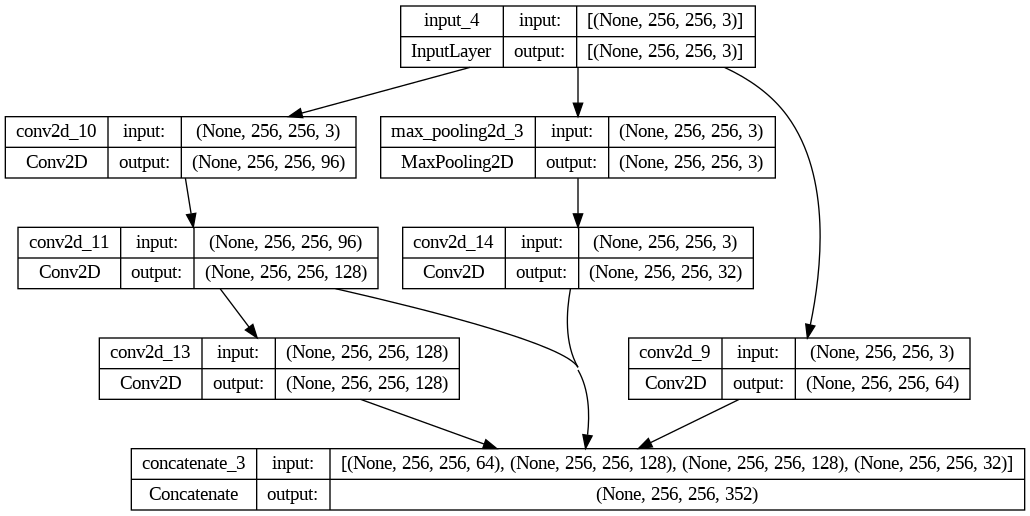

In [ ]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, to_file='inception.png')

## **skip connection 코드 살펴보기**
---
먼저 필요한 라이브러리를 불러옵니다.

In [ ]:
# 모델을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

skip connection이 구현된 함수 residual_module을 정의합니다.

residual_module을 정의할 때 주의점은 skip connection을 구성하기 위해서 connection을 통해서 합해지는 feature map들의 가로x세로x채널 사이즈가 맞아야 한다는 것입니다.

In [ ]:
def residual_module(input_layer, n_filters):
	merge_input = input_layer

# if문에서는 채널 사이즈가 동일한지 확인하고, 만일 동일하지 않다면 1x1 convolution을 통해서 채널 사이즈를 맞춰 준다.
	if input_layer.shape[-1] != n_filters:
		merge_input = keras.layers.Conv2D(n_filters, (1,1), padding='same', activation='relu')(input_layer) # n_filter로 채널 사이즈를 맞춰 준다.
	# Conv2D layer
	conv1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu')(input_layer)
	# Conv2D layer
	conv2 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)

  # Add를 통해서 skip connection을 구현하는 부분
	out_layer = keras.layers.Add()([conv2, merge_input])
	out_layer = keras.layers.Activation('relu')(out_layer)

	return out_layer

input layer를 정의하고 residual module을 생성합니다.

In [ ]:
input = keras.layers.Input(shape=(256, 256, 3))
residual_out = residual_module(input, 64)

In [ ]:
print(residual_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 64), dtype=tf.float32, name=None), name='activation/Relu:0', description="created by layer 'activation'")


input layer와 residual module을 연결해서 모델을 만듭니다.

In [ ]:
model = keras.models.Model(inputs=input, outputs=residual_out)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 64  1792        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_16[0][0]']              
                                )                                                           

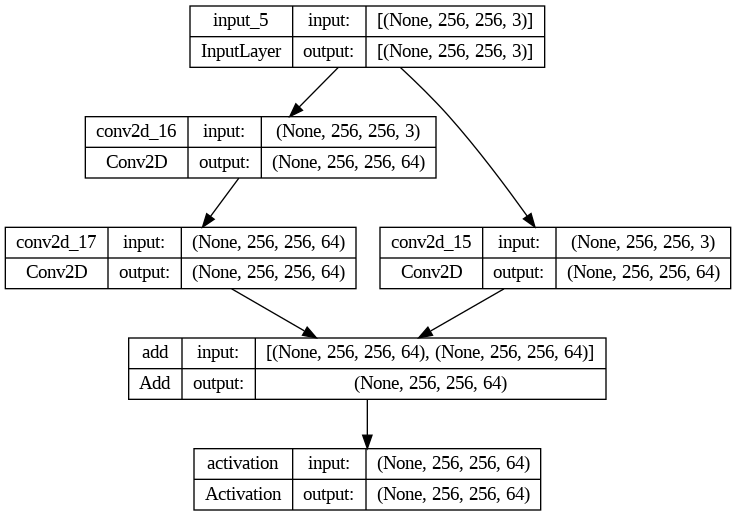

In [ ]:
plot_model(model, show_shapes=True, to_file='residual_module.png')